**Task:**

Understand Lasso and Ridge regression using the shared book ISLR and apply Lasso and Ridge regression on given dataset for finding the salary of the player.



**The data**

The given data is in .xlsx format. Its various columns are the parameters that describe a player and which affect
the target variable(Salary). The rows are unique records for different players with values for each parameter as
well as their Salary.

**Approach**
1. Check the data to see if it needs any cleaning and preprocessing followed by visualization of the data
2. Perform some sort of dimensionality reduction, maybe by using the correlation matrix.
3. Train both the regressors for various values of alpha(tuning parameter) to find the best value of alpha. We then
use these models to perform the predictions on the missing values.
4. Checking the R2 scores and the Mean Squared Error for each case to find out the improvement(if any).


**Importing the required libraries**

In [ ]:
#For data manipulation and preprocessing
import pandas as pd
import numpy as np
from scipy.stats import norm
# For data visualisation
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# For Regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.linear_model import LinearRegression
from sklearn.utils.testing import ignore_warnings
from sklearn.exceptions import ConvergenceWarning
from sklearn.linear_model import Lasso
# Metrics for the models
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
# For importing data
from google.colab import files
files.upload()

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.utils.testing module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.utils. Anything that cannot be imported from sklearn.utils is now part of the private API.
  warnings.warn(message, FutureWarning)


Saving Hitters.xlsx to Hitters.xlsx


{'Hitters.xlsx': b'PK\x03\x04\x14\x00\x06\x00\x08\x00\x00\x00!\x00LA\x02\x11_\x01\x00\x00\x90\x04\x00\x00\x13\x00\x08\x02[Content_Types].xml \xa2\x04\x02(\xa0\x00\x02\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x

Reading and Exploring the data

In [ ]:
data = pd.read_excel('Hitters.xlsx')

In [ ]:
data

AtBat  Hits  HmRun  Runs  RBI  ...  PutOuts  Assists  Errors  Salary  NewLeague
0      293    66      1    30   29  ...      446       33      20     NaN          A
1      315    81      7    24   38  ...      632       43      10   475.0          N
2      479   130     18    66   72  ...      880       82      14   480.0          A
3      496   141     20    65   78  ...      200       11       3   500.0          N
4      321    87     10    39   42  ...      805       40       4    91.5          N
..     ...   ...    ...   ...  ...  ...      ...      ...     ...     ...        ...
317    497   127      7    65   48  ...      325        9       3   700.0          N
318    492   136      5    76   50  ...      313      381      20   875.0          A
319    475   126      3    61   43  ...       37      113       7   385.0          A
320    573   144      9    85   60  ...     1314      131      12   960.0          A
321    631   170      9    77   44  ...      408        4       3  1000.0          A

[322 rows x 20 columns]

Shape of data


In [ ]:
data.shape

(322, 20)

Checking for Null values


In [ ]:
data.isnull().sum()

AtBat         0
Hits          0
HmRun         0
Runs          0
RBI           0
Walks         0
Years         0
CAtBat        0
CHits         0
CHmRun        0
CRuns         0
CRBI          0
CWalks        0
League        0
Division      0
PutOuts       0
Assists       0
Errors        0
Salary       59
NewLeague     0
dtype: int64

Creating test dataset


In [ ]:
test = data[data['Salary'].isnull()]

In [ ]:
test.shape

(59, 20)

Creating training dataset



In [ ]:
data = data[data['Salary'].notnull()]

In [ ]:
data.shape

(263, 20)

**Visualization**

Visualizing the correlation among different features using a heatmap

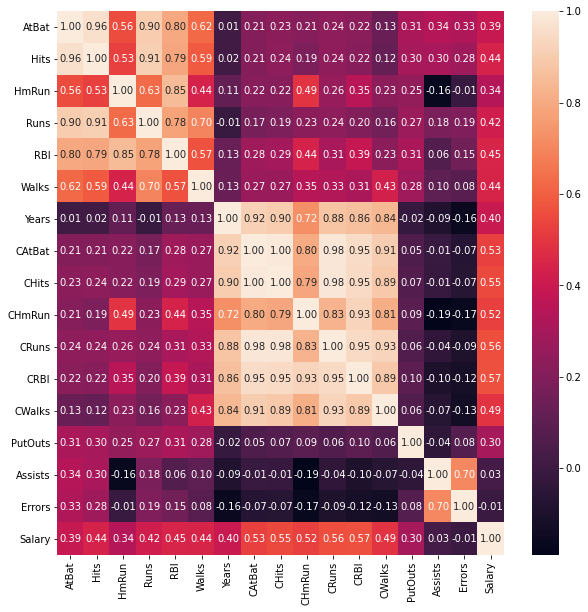

In [ ]:
cor_mat = data.corr()
plt.figure(figsize=(10,10))
sns.heatmap(cor_mat, annot=True, fmt='.2f')

Pairplots for all features

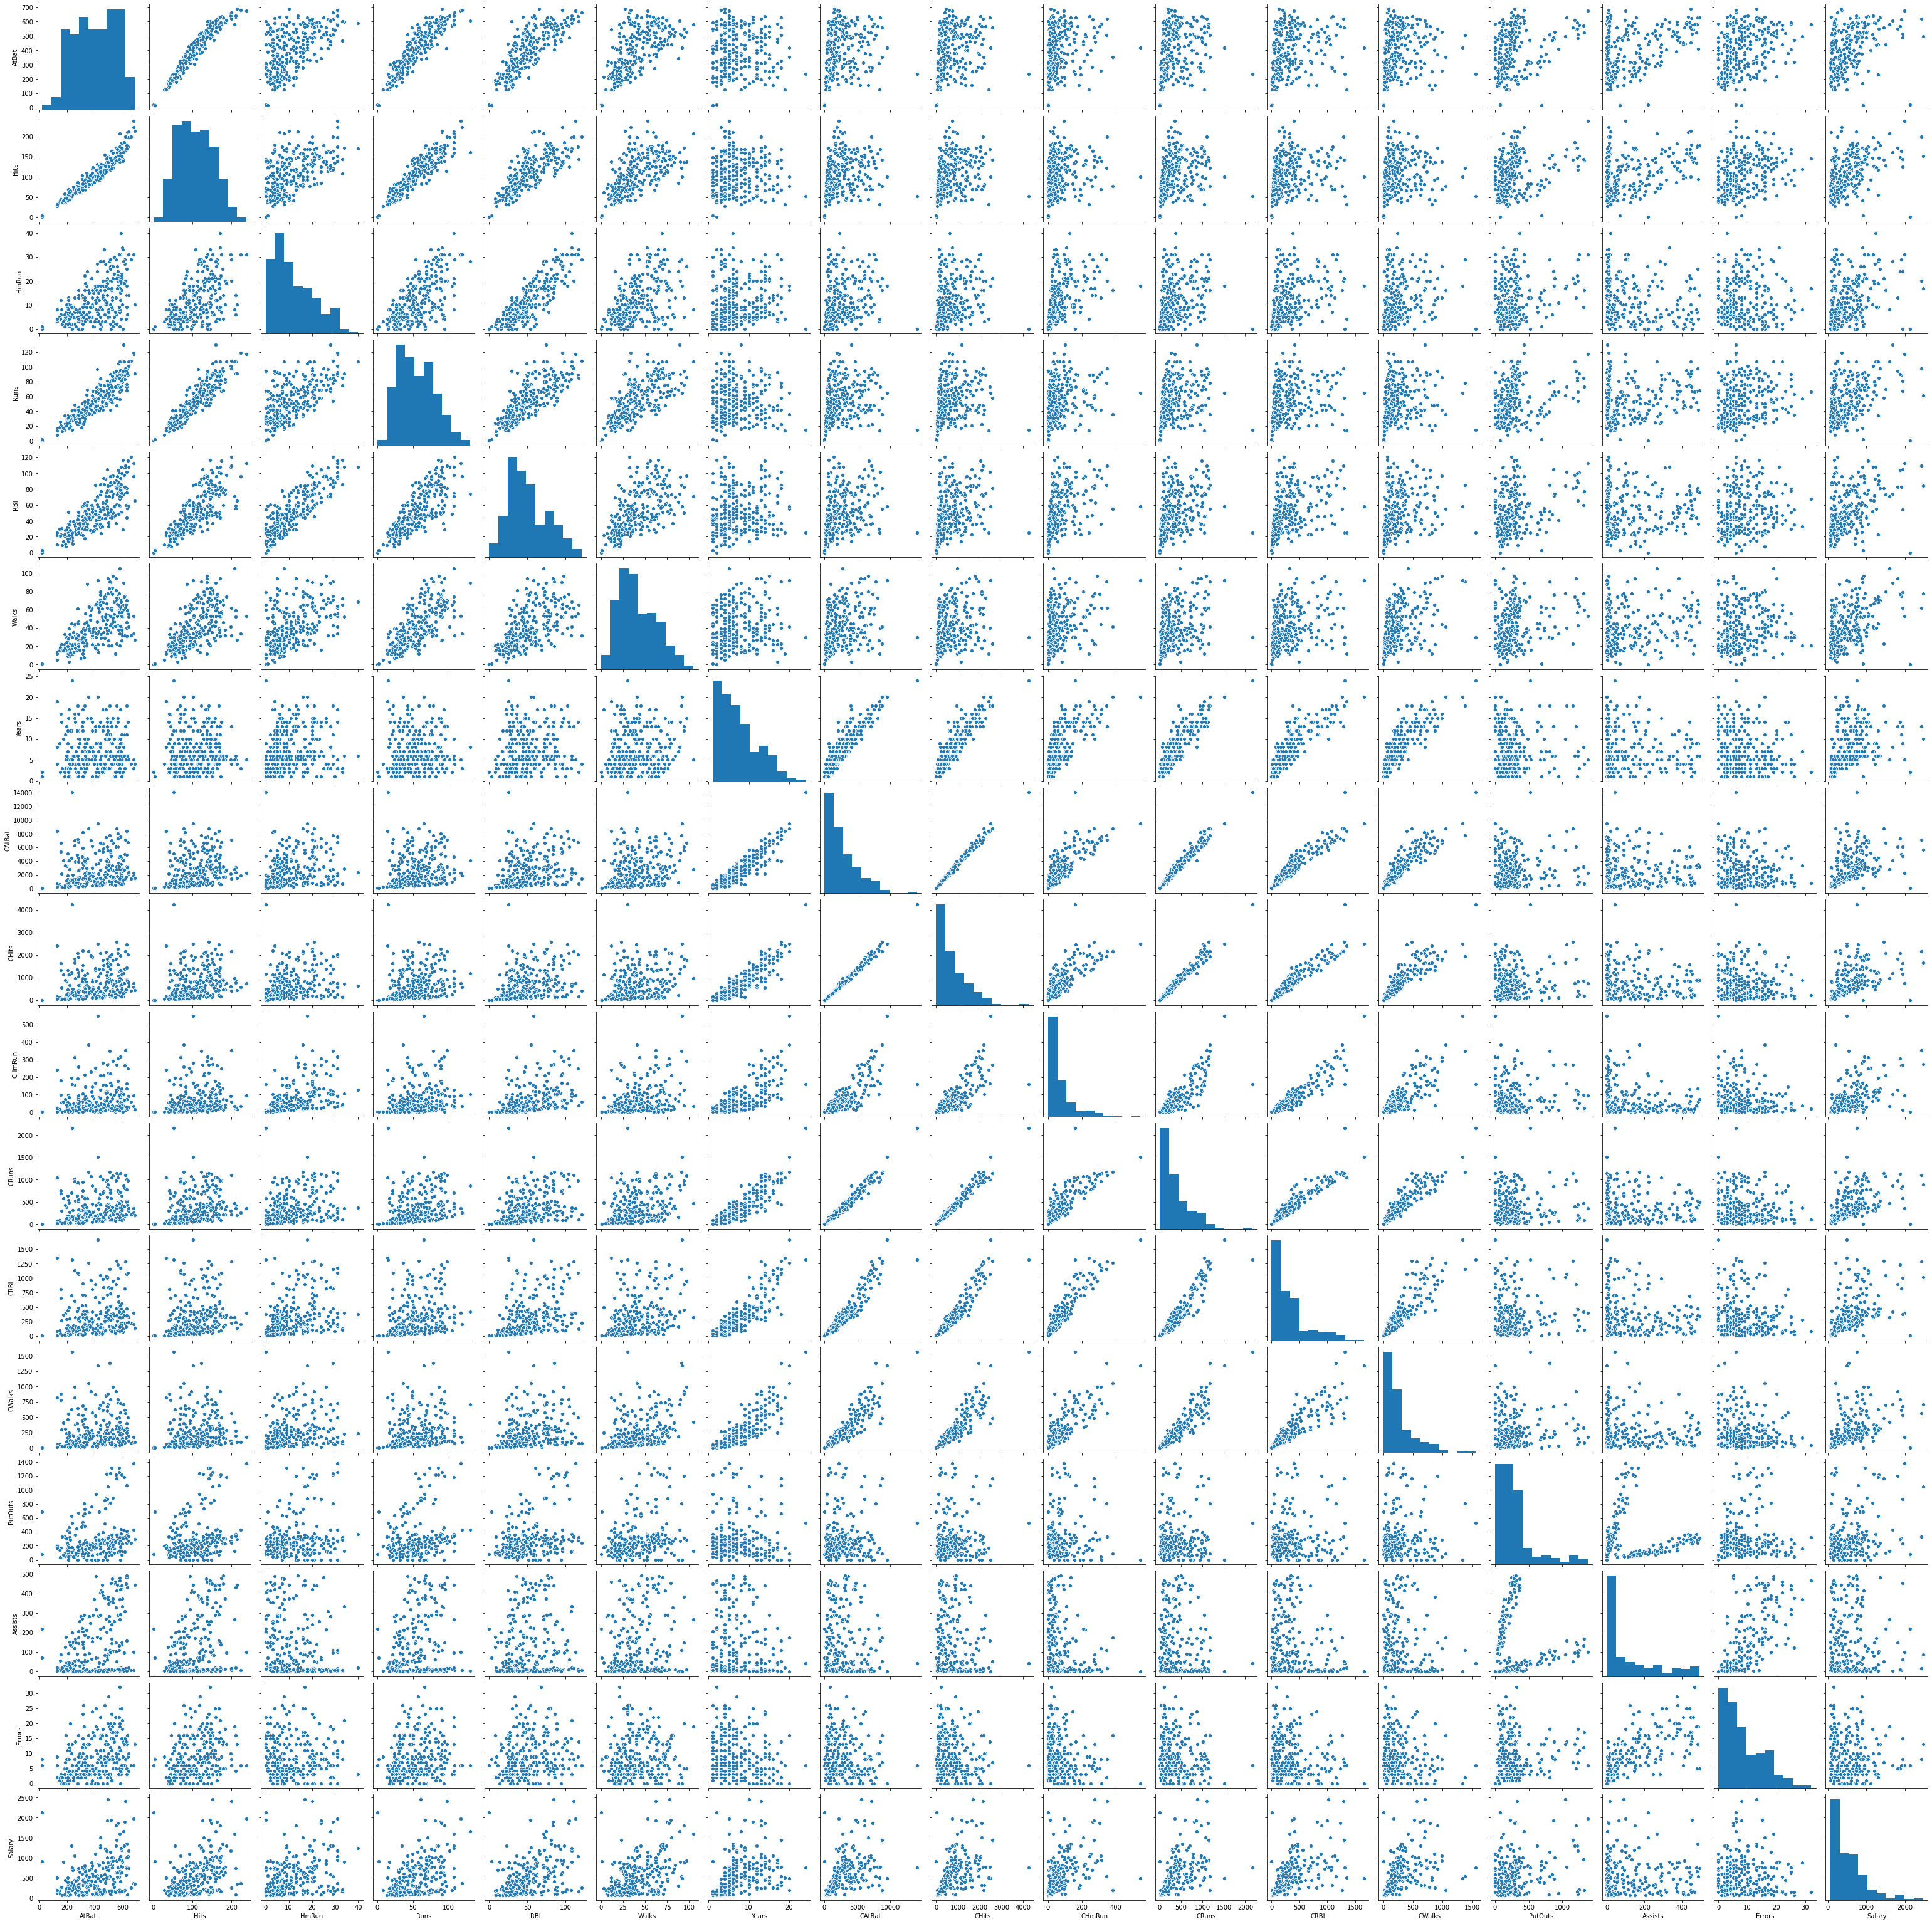

In [ ]:
sns.pairplot(data)

Selecting the features that highly affect the target variable and creating a heatmap for them

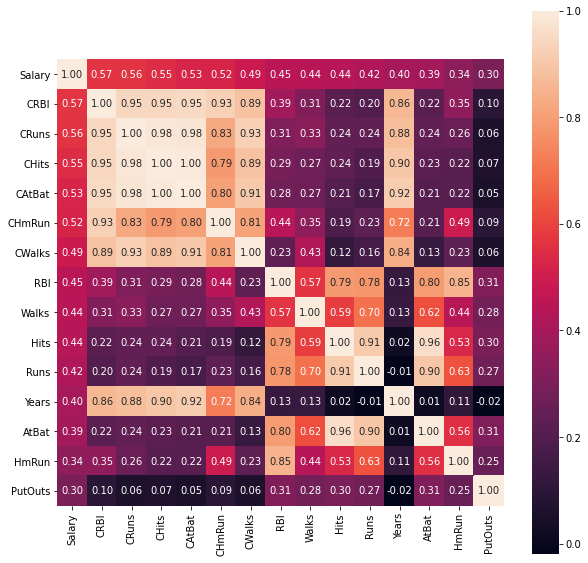

In [ ]:
feat = 15
fields = cor_mat.nlargest(feat, 'Salary')['Salary'].index
cm = np.corrcoef(data[fields].values.T)
plt.figure(figsize= (10, 10))
hm = sns.heatmap(cm, annot = True, square = True, fmt = '.2f', yticklabels=fields.values
, xticklabels=fields.values)
plt.show()

Pairplots for the most important features

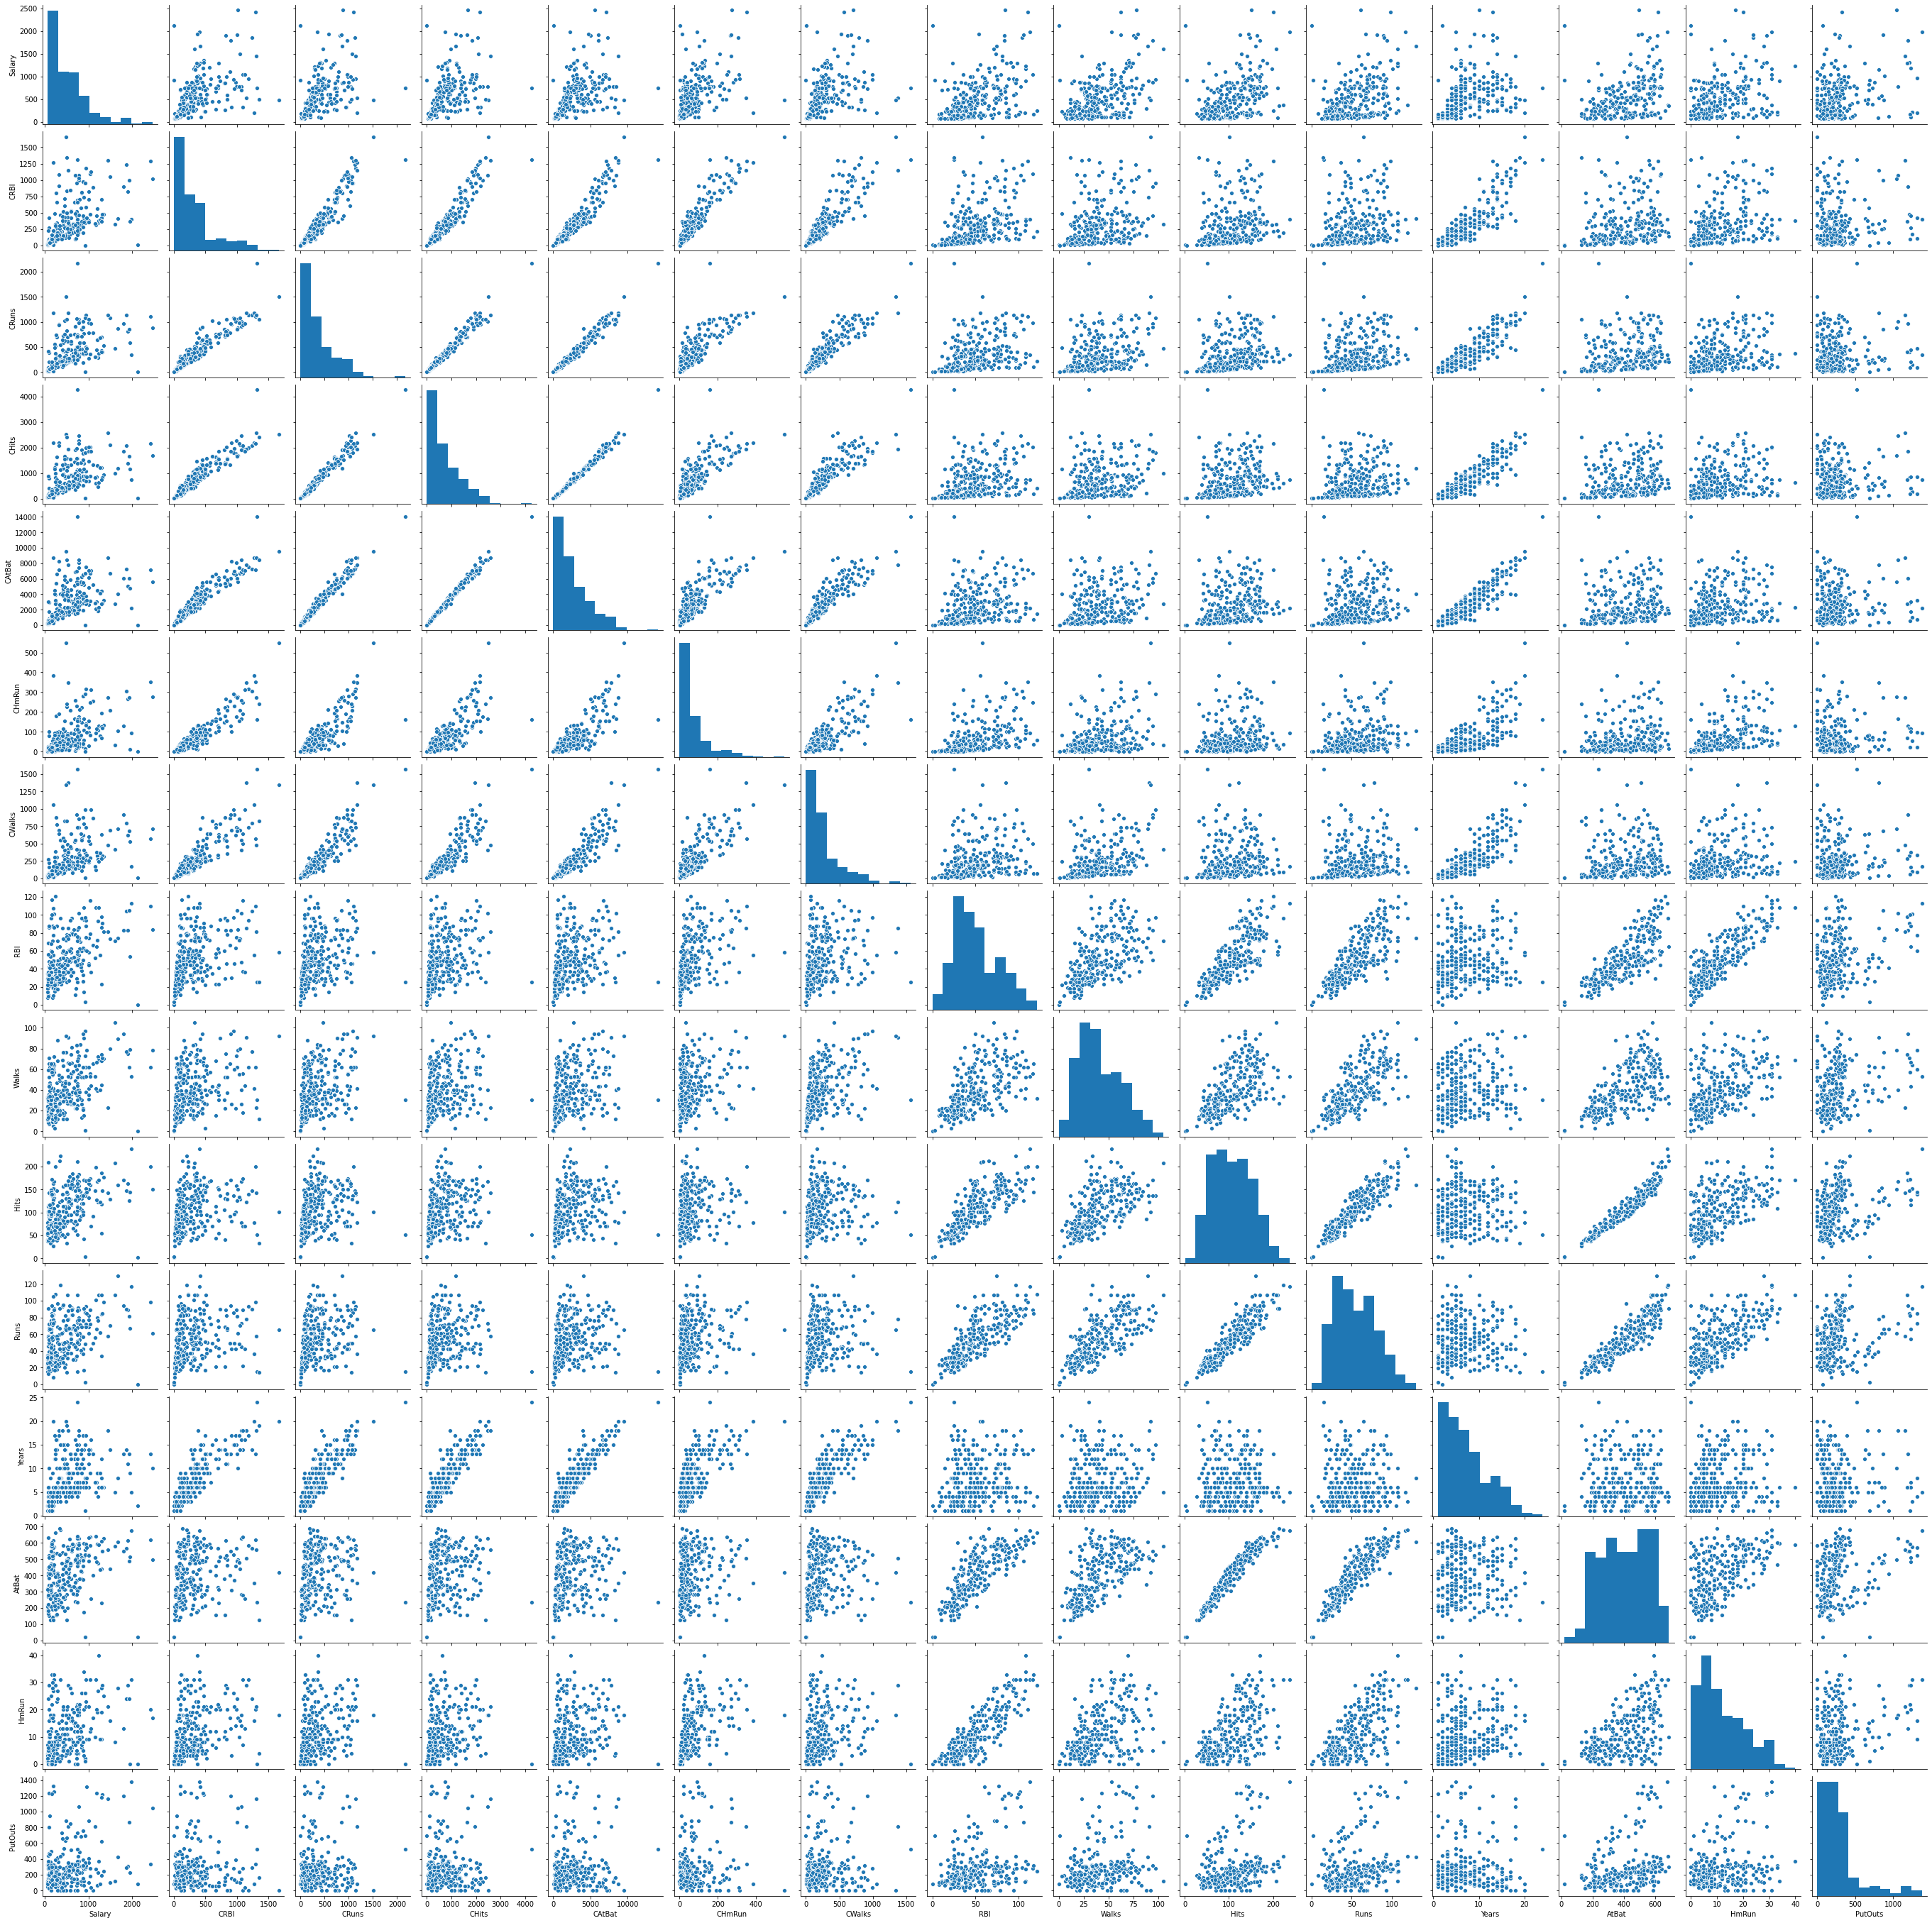

In [ ]:
sns.pairplot(data[fields])

In [ ]:
field = list(fields)
field.remove('Salary')
print(field)

['CRBI', 'CRuns', 'CHits', 'CAtBat', 'CHmRun', 'CWalks', 'RBI', 'Walks', 'Hits', 'Runs', 'Years', 'AtBat', 'HmRun', 'PutOuts']


Exploring the output

In [ ]:
y = data['Salary'].values
y.shape
pd.DataFrame(y).describe()

0
count   263.000000
mean    535.925882
std     451.118681
min      67.500000
25%     190.000000
50%     425.000000
75%     750.000000
max    2460.000000

In [ ]:
x = data[field]
x.shape

(263, 14)

Scatterplots for the features vs Salary

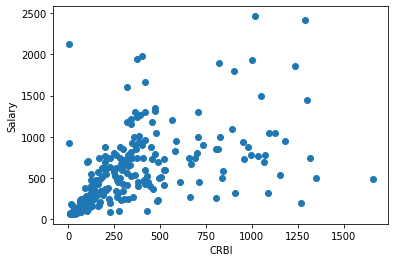

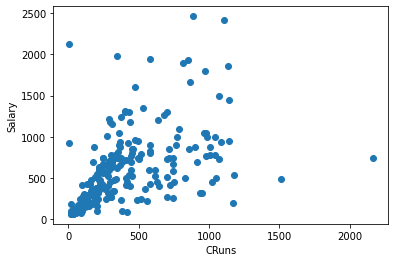

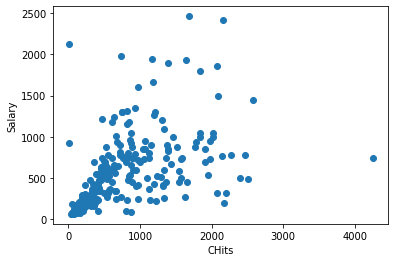

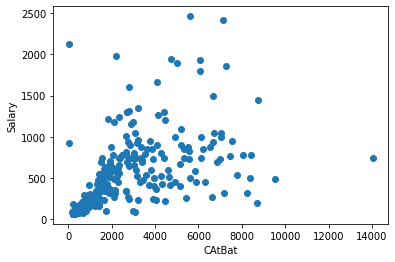

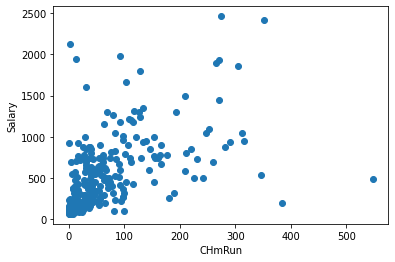

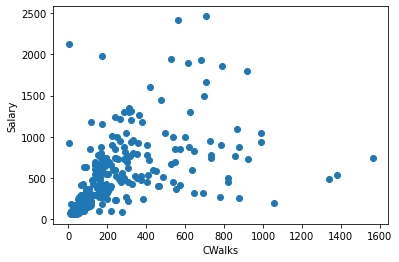

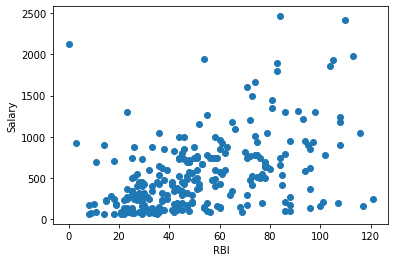

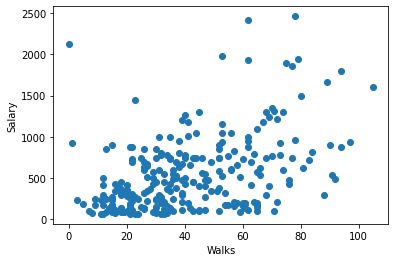

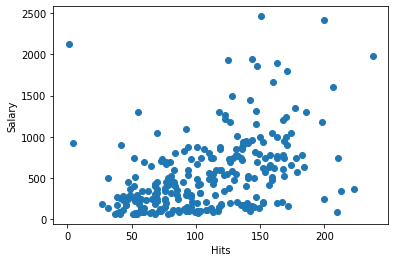

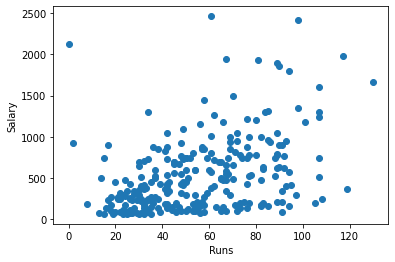

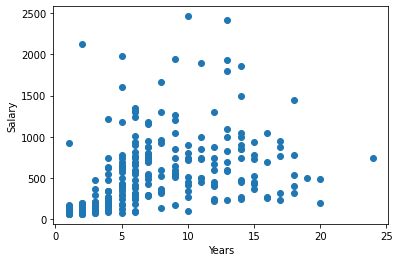

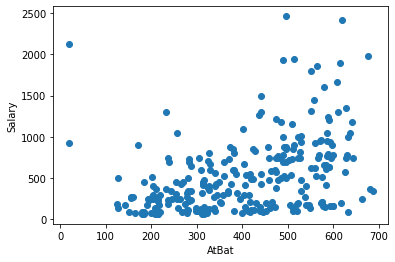

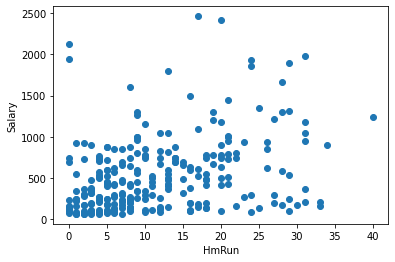

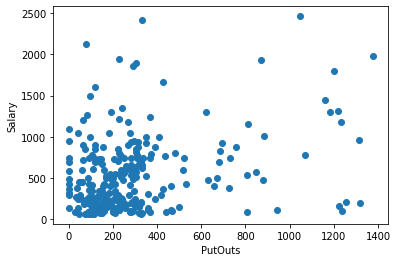

In [ ]:
for col in x.columns:
  plt.scatter(x[col][::], y[::])
  plt.xlabel(col)
  plt.ylabel('Salary')
  plt.show()

Creating training and validation sets

In [ ]:
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size = 0.3, random_state =40)

Linear Regression

In [ ]:
lin_reg = LinearRegression()
lin_reg.fit(x_train, y_train)
y_val_lr = lin_reg.predict(x_val)
r2 = r2_score(y_val, y_val_lr)
mse = mean_squared_error(y_val, y_val_lr)

In [ ]:
print('LR r2:', r2)
print('LR mse:', mse)

LR r2: 0.4938380797244203
LR mse: 117743.38499844934


Ridge Regression

In [ ]:
params = [1e-15, 1e-10, 1e-8, 1e-4, 1e-3, 1e-2, 1,5 ,10, 20, 40, 100]
def RIDGE(params):
  least = 0
  b = 0
  for i in params:
    ridge = Ridge(alpha=i)
    ridge.fit(x_train, y_train)
    y_val_r = ridge.predict(x_val)
    mse = mean_squared_error(y_val, y_val_r)
    print('alpha =', i)
    print('R r2:', r2_score(y_val, y_val_r))
    print('R mse:', mse, '\n')
    if least == 0:
      least = mse
      b = i
    if mse < least:
      least = mse
      b = i
  ridge = Ridge(alpha=b)
  ridge.fit(x_train, y_train)
  return ridge
best_alpha_r_model = RIDGE(params)

alpha = 1e-15
R r2: 0.4938380797244445
R mse: 117743.38499844374 

alpha = 1e-10
R r2: 0.49383807972444593
R mse: 117743.38499844338 

alpha = 1e-08
R r2: 0.49383807972455795
R mse: 117743.38499841733 

alpha = 0.0001
R r2: 0.4938380808741073
R mse: 117743.38473100918 

alpha = 0.001
R r2: 0.4938380912210767
R mse: 117743.38232409715 

alpha = 0.01
R r2: 0.49383819468871304
R mse: 117743.3582554558 

alpha = 1
R r2: 0.4938495537102757
R mse: 117740.71591987998 

alpha = 5
R r2: 0.4938950021240246
R mse: 117730.14370995418 

alpha = 10
R r2: 0.4939508312640499
R mse: 117717.15673550032 

alpha = 20
R r2: 0.4940593718047622
R mse: 117691.90803511198 

alpha = 40
R r2: 0.49426500457358724
R mse: 117644.07374079194 

alpha = 100
R r2: 0.4948070809990702
R mse: 117517.9759236557 



Lasso Regression

In [ ]:
@ignore_warnings(category=ConvergenceWarning)
def LASSO(params):
  least = 0
  b = 0
  for i in params:
    lasso = Lasso(alpha= i)
    lasso.fit(x_train, y_train)
    y_val_l = lasso.predict(x_val)
    r2 = r2_score(y_val, y_val_l)
    mse = mean_squared_error(y_val, y_val_l)
    print('alpha =', i)
    print('L r2:', r2)
    print('L mse:', mse, '\n')
    if least == 0:
      least = mse
      b = i
    if mse < least:
      least = mse
      b = i
  lasso = Lasso(alpha= b)
  lasso.fit(x_train, y_train)
  return lasso
best_alpha_l_model = LASSO(params)

alpha = 1e-15
L r2: 0.49607780006356916
L mse: 117222.38125712151 

alpha = 1e-10
L r2: 0.4960778000636362
L mse: 117222.3812571059 

alpha = 1e-08
L r2: 0.49607780007036595
L mse: 117222.38125554046 

alpha = 0.0001
L r2: 0.49607786802402554
L mse: 117222.36544816026 

alpha = 0.001
L r2: 0.4960784796625811
L mse: 117222.22316880056 

alpha = 0.01
L r2: 0.49608459549822614
L mse: 117220.80050312362 

alpha = 1
L r2: 0.49675417411048706
L mse: 117065.04312752484 

alpha = 5
L r2: 0.49923829927831664
L mse: 116487.18593538196 

alpha = 10
L r2: 0.5006041737842244
L mse: 116169.4562102357 

alpha = 20
L r2: 0.5025627283519967
L mse: 115713.85725014775 

alpha = 40
L r2: 0.5062834156946681
L mse: 114848.35096708225 

alpha = 100
L r2: 0.5148004448700553
L mse: 112867.11965538132 



Lasso on Test Set

In [ ]:
x_test = test[field]
y_test_l = best_alpha_l_model.predict(x_test)
pd.DataFrame(y_test_l).describe()

0
count    59.000000
mean    482.311806
std     336.645030
min     166.403359
25%     235.888629
50%     332.797227
75%     617.421863
max    1451.356950

Ridge on Test Set

In [ ]:
y_test_r = best_alpha_r_model.predict(x_test)
pd.DataFrame(y_test_r).describe()

0
count    59.000000
mean    489.352350
std     349.119685
min     174.963115
25%     233.011502
50%     349.071671
75%     619.382315
max    1473.836164

Linear Regression on Test Set

In [ ]:
y_test_lr = lin_reg.predict(x_test)
pd.DataFrame(y_test_lr).describe()

0
count    59.000000
mean    489.683559
std     349.636341
min     174.411652
25%     231.992653
50%     348.919382
75%     620.148050
max    1473.703232

**Visualising the Results**

Linear Regression

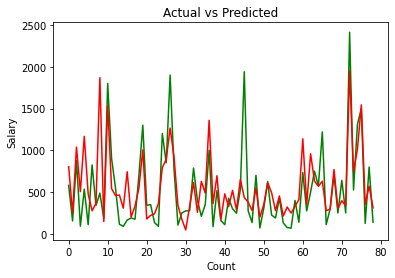

In [ ]:
plt.plot(range(len(y_val)), y_val, c='g')
plt.plot(range(len(y_val)), lin_reg.predict(x_val), c='r')
plt.xlabel('Count')
plt.ylabel('Salary')
plt.title('Actual vs Predicted')
plt.show()

Lasso

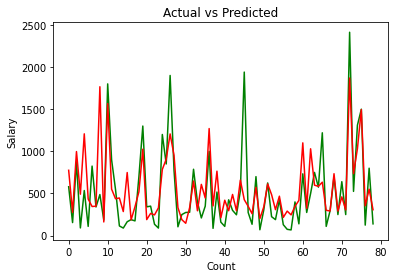

In [ ]:
plt.plot(range(len(y_val)), y_val, c='g')
plt.plot(range(len(y_val)), best_alpha_l_model.predict(x_val), c='r')
plt.xlabel('Count')
plt.ylabel('Salary')
plt.title('Actual vs Predicted')
plt.show()

Ridge

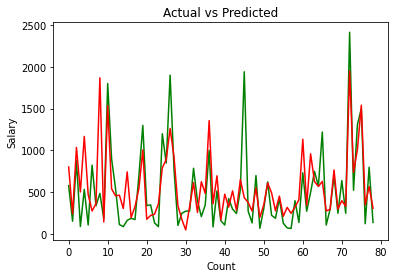

In [ ]:
plt.plot(range(len(y_val)), y_val, c='g')
plt.plot(range(len(y_val)), best_alpha_r_model.predict(x_val), c='r')
plt.xlabel('Count')
plt.ylabel('Salary')
plt.title('Actual vs Predicted')
plt.show()

In [ ]:
#Conclusion
#It is pretty evident from the results that ridge and lasso regression both improve upon the results of linear
#regression. However, the impact is not that significant on this dataset due to its limited size. The best performing
#model out of the three was LASSO, with and R2 score of ~52